In [1]:
import string
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('spam.csv', encoding = 'latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace = True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [368]:
data.rename(columns = {'v1': 'Spam/Ham', 'v2': 'message'}, inplace = True)
data.head()

,Spam/Ham,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [369]:
data['label'] = data['Spam/Ham'].map({'ham' : 0, 'spam' : 1})
data.head()

,Spam/Ham,message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [370]:
data.drop(['Spam/Ham'], axis = 1, inplace = True)

In [371]:
data['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

In [372]:
# X_train = data.sample(frac=0.8, random_state=100)
# X_test = data[~data.index.isin(X_train.index)]
# ratio = len(X_train)/(len(X_test)+len(X_train))
# print(ratio)

In [373]:
# spam_words = data[data['label'] == 1][['message', 'label']]
# spam_words = ' '.join(list(data[data['label'] == 1]['message']))
# message_data = data.loc[data['label'] == 0, 'message']
# message_data = data['message'].copy()
# message_data

In [374]:
# def text_preprocess(text):
#     text = text.translate(str.maketrans('', '', string.punctuation))
#     text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
#     return " ".join(text)


In [375]:
# message_data = message_data.apply(text_preprocess)

In [376]:
# message_data

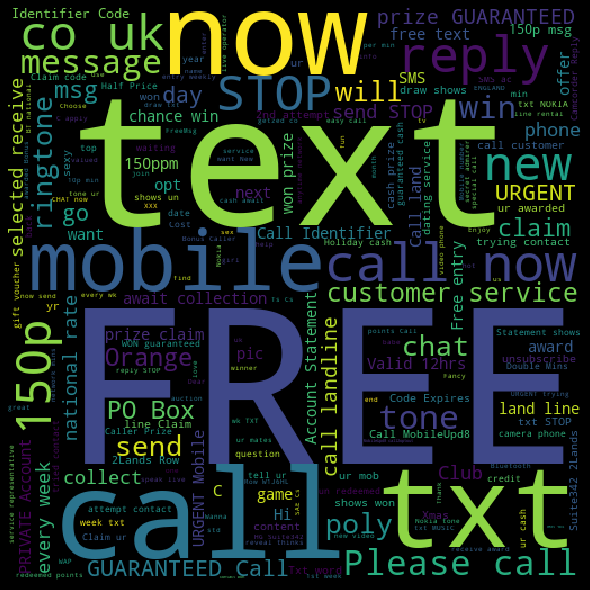

In [377]:
spam_words = ' '.join(list(data.loc[data['label'] == 1, 'message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

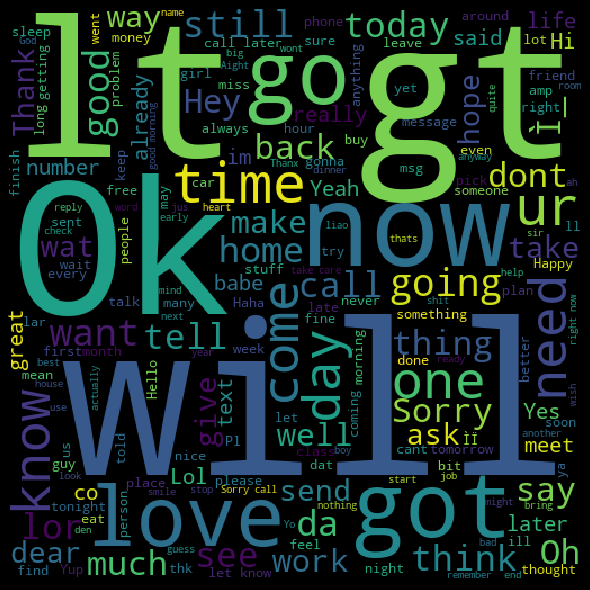

In [378]:
spam_words = ' '.join(list(data.loc[data['label'] == 0, 'message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [379]:
# test_test = "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
# mtr = test_test.maketrans('', '', string.punctuation)
# test_test = test_test.translate(mtr)
# test_test

In [380]:
# calculate accurecy
def calculate_accurecy(y_true, y_pred):   
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    F1 = 2*(precision*recall)/(precision+recall)
    
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('F1:%.3f'%F1)
    return accuracy, recall, precision, F1

def ConfusionMatrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm,['Ham', 'Spam'], ['Ham','Spam'])                      
    f, ax = plt.subplots(figsize=(6, 4))
    sn.heatmap(cm_df, annot=True, fmt="d")
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    

In [381]:
def model_logistic(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    vectorizer = TfidfVectorizer("english")
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    model = LogisticRegression(solver='liblinear', penalty='l1').fit(X_train,y_train)

    print('\n --- Training Acuurecy---\n')
    y_pred = model.predict(X_train)
    calculate_accurecy(y_train, y_pred)
    print('\n --- Test Acuurecy---\n')
    y_pred = model.predict(X_test)
    calculate_accurecy(y_test, y_pred)
    title = "Confusion Matrix (Logistic Regression)"
    ConfusionMatrix(y_test, y_pred, title)
    return model, vectorizer

def model_randomForest(X, y):
#     vectorizer = TfidfVectorizer("english")
#     X_vt = vectorizer.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    vectorizer = TfidfVectorizer("english")
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    model = RandomForestClassifier().fit(X_train,y_train)

    print('\n --- Training Acuurecy---\n')
    y_pred = model.predict(X_train)
    calculate_accurecy(y_train, y_pred)
    print('\n --- Test Acuurecy---\n')
    y_pred = model.predict(X_test)
    calculate_accurecy(y_test, y_pred)
    title = "Confusion Matrix (Logistic Regression)"
    ConfusionMatrix(y_test, y_pred, title)
    return model, vectorizer

In [401]:
def remove_punctuations(data_input):
    exclude = set(string.punctuation)
    tx = list()
    for xx in data_input:
        text = ''.join([ch for ch in xx if ch not in exclude])
        tx.append(text)
    return pd.Series(tx)

def remove_stop_word(data_input):
    stop_word = set(stopwords.words('english'))
    tx = list()
    for xx in data_input:
        text = ' '.join([word for word in xx.split() if word.lower() not in stop_word])
        tx.append(text)
    return pd.Series(tx)

def Stemmer_Porter(data_input):
    from nltk.stem import PorterStemmer
    ps = PorterStemmer()
    tx = list()
    for xx in data_input:
        tex = ' '.join([ps.stem(word) for word in xx.split()])
        tx.append(tex)
    return pd.Series(tx)

def Stemmer_Snowball(data_input):
    from nltk.stem.snowball import SnowballStemmer
    snow = SnowballStemmer("english")
    tx = list()
    for xx in data_input:
        tex = ' '.join([snow.stem(word) for word in xx.split()])
        tx.append(tex)
    return pd.Series(tx)

def Stemmer_Lancaster(data_input):
    from nltk.stem.lancaster import LancasterStemmer
    lan = LancasterStemmer()
    tx = list()
    for xx in data_input:
        tex = ' '.join([lan.stem(word) for word in xx.split()])
        tx.append(tex)
    return pd.Series(tx)

def Stemmer_WordNetLemmatizer(data_input):
    from nltk.stem import WordNetLemmatizer 
    lemmatizer = WordNetLemmatizer() 
    tx = list()
    for xx in data_input:
        tex = ' '.join([lemmatizer.lemmatize(word) for word in xx.split()])
        tx.append(tex)
    return pd.Series(tx)

In [402]:
def pre_process(stemmer_lists, email_input):
    for stremmer in stemmer_lists:
        email_input = stremmer(email_input)

    return email_input



 --- Training Acuurecy---

accuracy:1.000
recall:1.000
precision:1.000
F1:1.000

 --- Test Acuurecy---

accuracy:0.968
recall:0.968
precision:0.969
F1:0.969


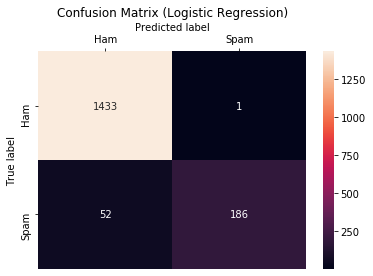

In [403]:
stemmer_lists = [remove_punctuations, remove_stop_word, Stemmer_Porter, Stemmer_WordNetLemmatizer]
X = pre_process(stemmer_lists, data['message'])
# model, vectorizer = model_logistic(X, data['label'])
model, vectorizer = model_randomForest(X, data['label'])

In [407]:
## Check Specific email
tx00 = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
tx01 = pd.Series(tx00)
X_check = pre_process(stemmer_lists, tx01)
text_vect = vectorizer.transform(X_check)
prediction = model.predict(text_vect)
print("The Email is: ", tx00, '\n')
print('This Email is', 'NOT SPAM' if prediction == 0 else 'SPAM')


The Email is:  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

This Email is SPAM


In [258]:
## Check specific email
def text_stemming(text):
    from nltk.stem import PorterStemmer
    from nltk.stem import WordNetLemmatizer 
    from nltk.stem.lancaster import LancasterStemmer

    exclude = set(string.punctuation)
    stop_word = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer() 
    ps = PorterStemmer()
    lan = LancasterStemmer()
    tex = ''.join([ch for ch in text if ch not in exclude])
    tex = ' '.join([word for word in tex.split() if word.lower() not in stop_word])
    tex = ' '.join([lemmatizer.lemmatize(word) for word in tex.split()])
#     tex = ' '.join([ps.stem(word) for word in tex.split()])
    tex = ' '.join([lan.stem(word) for word in tex.split()])
    return tex

In [278]:
## Check Specific email
tx = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
# tx = "Ok lar... Joking wif u oni..."
text = text_stemming(tx)
text = pd.Series(text)
text_vect = vectorizer.transform(text)
prediction = model_log.predict(text_vect)
# if prediction == 0:
#     print("The Email is NOT SPAM")
# else:
#     print("The Email is SPAM")
print("The Email is :", tx, '\n')

print('The Email is', 'NOT SPAM' if prediction == 0 else 'SPAM')

The Email is : Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

The Email is SPAM
